In [77]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv("telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.T  # transposed so we can see more data at a time

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes


In [79]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

As TotalCharges column is object there must be some non-numeric values in the column, we can use to_numeric function of pandas to convert into the numeric values and keep errors='coerce' so that the non-numeric values such as white spaces are converted to NaN

In [80]:
total_charges = pd.to_numeric(df['TotalCharges'],errors='coerce')
df[total_charges.isnull()][['customerID','TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


Replacing NaN values with zero

In [81]:
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors = 'coerce')
df.TotalCharges = df.TotalCharges.fillna(0)
df.TotalCharges.dtype, df.TotalCharges.isnull().sum()

(dtype('float64'), 0)

Making the column names with same naming convention

In [82]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

Making the values in column with same naming convention

In [83]:
string_columns = list(df.dtypes[df.dtypes == "object"].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ','_')

Converting our target variable which is categorical to int. First we will set `yes` as `boolean True` and `no` as ` boolean false` and then type cast it into int which will make `True` as `1` and `False` as `0`.

In [84]:
df.churn = df.churn == 'yes'  
df.churn  # They are converted into boolean

0       False
1       False
2        True
3       False
4        True
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: churn, Length: 7043, dtype: bool

In [85]:
df.churn = df.churn.astype(int)
df.churn  # Converted to integer

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

In [86]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu,9305-cdskc,1452-kiovk,6713-okomc,7892-pookp,6388-tabgu,...,9767-fflem,0639-tsiqw,8456-qdavc,7750-eyxwz,2569-wgero,6840-resvb,2234-xaduh,4801-jzazl,8361-ltmkd,3186-ajiek
gender,female,male,male,male,female,female,male,female,female,male,...,male,female,male,female,female,male,female,female,male,male
seniorcitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
partner,yes,no,no,no,no,no,no,no,yes,no,...,no,no,no,no,no,yes,yes,yes,yes,no
dependents,no,no,no,no,no,no,yes,no,no,yes,...,no,no,no,no,no,yes,yes,yes,no,no
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
phoneservice,no,yes,yes,no,yes,yes,yes,no,yes,yes,...,yes,yes,yes,no,yes,yes,yes,no,yes,yes
multiplelines,no_phone_service,no,no,no_phone_service,no,yes,yes,no_phone_service,yes,no,...,no,yes,no,no_phone_service,no,yes,yes,no_phone_service,yes,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic,fiber_optic,fiber_optic,dsl,fiber_optic,dsl,...,fiber_optic,fiber_optic,fiber_optic,dsl,no,dsl,fiber_optic,dsl,fiber_optic,fiber_optic
onlinesecurity,no,yes,yes,yes,no,no,no,yes,no,yes,...,no,yes,no,no,no_internet_service,yes,no,yes,no,yes


Now we will be splitting into the train and test dataset. We will use train_test_split from sklearn.model_selection

In [87]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
# this function first shuffles the dataframe and then splits it into train and test datasets

We wil be needing the validation dataset thus splitting the `df_train_full` into two parts using the same function

In [88]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

Preparing y matrix for train and validation dataset

In [89]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

## Exploratory data analysis

In [90]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [91]:
# Cslculating the churn rate
global_mean = df_train_full.churn.mean().round(3)  # our dataset is the example of imbalanced dataset
global_mean

0.27

In [92]:
df_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
dtype: object

In [93]:
categorical = ['gender','seniorcitizen','partner','dependents','phoneservice','multiplelines','internetservice','onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies','contract','paperlessbilling','paymentmethod']
numerical = ['tenure','monthlycharges','totalcharges']

In [94]:
# Checking for the unique values for categorical variables
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

Now we have to select the features that effect our target variable (churn). We will be calculating the churn rate for each of the features and subract them from the global churn rate, if the difference is large then it is an important feature deciding churn.

In [95]:
# Gender
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean().round(3)
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean().round(3)
female_mean, male_mean, global_mean

(0.277, 0.263, 0.27)

We can see that the difference is not large thus we can ignore the feature = 'gender'

Similarly performing for feature = 'partner'

In [96]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean().round(3)
partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean().round(3)
partner_yes, partner_no, global_mean

(0.205, 0.33, 0.27)

The difference between the global_mean and the churn means of with or without partner is considerable. Thus it is an important feature. Also, the clients with no partner are more likely to churn.

We need to create a function that can do this work for all the columns

In [97]:
for col in categorical:
    df_group = df_train_full.groupby(by = col).churn.agg(['mean']).round(3)
    df_group['diff'] = global_mean - df_group['mean']
    df_group['risk'] = df_group['mean']/global_mean
    display(df_group)  # we had to use display explicitly because we were not able to see the content of dataframe in `loop`

,mean,diff,risk
gender,,,
female,0.277,-0.007,1.025926
male,0.263,0.007,0.974074


,mean,diff,risk
seniorcitizen,,,
0,0.242,0.028,0.896296
1,0.413,-0.143,1.529630


,mean,diff,risk
partner,,,
no,0.330,-0.060,1.222222
yes,0.205,0.065,0.759259


,mean,diff,risk
dependents,,,
no,0.314,-0.044,1.162963
yes,0.166,0.104,0.614815


,mean,diff,risk
phoneservice,,,
no,0.241,0.029,0.892593
yes,0.273,-0.003,1.011111


,mean,diff,risk
multiplelines,,,
no,0.257,0.013,0.951852
no_phone_service,0.241,0.029,0.892593
yes,0.291,-0.021,1.077778


,mean,diff,risk
internetservice,,,
dsl,0.192,0.078,0.711111
fiber_optic,0.425,-0.155,1.574074
no,0.078,0.192,0.288889


,mean,diff,risk
onlinesecurity,,,
no,0.421,-0.151,1.559259
no_internet_service,0.078,0.192,0.288889
yes,0.153,0.117,0.566667


,mean,diff,risk
onlinebackup,,,
no,0.404,-0.134,1.496296
no_internet_service,0.078,0.192,0.288889
yes,0.217,0.053,0.803704


,mean,diff,risk
deviceprotection,,,
no,0.396,-0.126,1.466667
no_internet_service,0.078,0.192,0.288889
yes,0.230,0.040,0.851852


,mean,diff,risk
techsupport,,,
no,0.419,-0.149,1.551852
no_internet_service,0.078,0.192,0.288889
yes,0.160,0.110,0.592593


,mean,diff,risk
streamingtv,,,
no,0.343,-0.073,1.270370
no_internet_service,0.078,0.192,0.288889
yes,0.303,-0.033,1.122222


,mean,diff,risk
streamingmovies,,,
no,0.339,-0.069,1.255556
no_internet_service,0.078,0.192,0.288889
yes,0.307,-0.037,1.137037


,mean,diff,risk
contract,,,
month-to-month,0.432,-0.162,1.600000
one_year,0.121,0.149,0.448148
two_year,0.028,0.242,0.103704


,mean,diff,risk
paperlessbilling,,,
no,0.172,0.098,0.637037
yes,0.338,-0.068,1.251852


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168,0.102,0.622222
credit_card_(automatic),0.164,0.106,0.607407
electronic_check,0.456,-0.186,1.688889
mailed_check,0.194,0.076,0.718519


If variables are mutually depending with the target variable we can consider it as an important feature, otherwise it is independent and we can remove that feature from our dataset.
We will use `mutual_info_score` from `sklearn.metrics`

We use the apply method to apply the calculate_mi function we defined in A to each column of the df_train_full dataframe. Because we include an additional step of selecting only categorical variables, it’s applied only to them. The function we define in A takes only one parameter: series. This is a column from the dataframe on which we invoked the apply() method.

In [98]:
from unicodedata import name
from sklearn.metrics import mutual_info_score
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name = 'MI')
df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


For numerical features we will use correlation

In [99]:
df_corr = df_train_full[numerical].corrwith(df_train_full.churn)
df_corr = df_corr.to_frame(name='correlation')
df_corr

,correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


Now we need to turn the categorical features to numeric values. We will be using one hot encoding (DictVectorizer). This first converts dataframe into dictionary and then the dictionary is vectorized to matrix which is further used to train model.

In [100]:
train_dict = df_train[categorical+numerical].to_dict(orient='rows')
train_dict[0]

C:\Users\Admin\AppData\Local\Temp/ipykernel_8376/2436036510.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  train_dict = df_train[categorical+numerical].to_dict(orient='rows')


{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 71,
 'monthlycharges': 86.1,
 'totalcharges': 6045.9}

Passing this dictionary to DictVectorizer which will convert it into matrix.

In [101]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False) # sparse=False means it will be creating a simple NumPy array and not sparse matrix
dv.fit(train_dict)  # we invoke the function with `fit`, it does one hot encoding on categorical features and leave numerical values intact

DictVectorizer(sparse=False)

In [102]:
# Transforming the dictionary to create matrix
X_train = dv.transform(train_dict)
X_train[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 8.6100e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 6.0459e+03])

In [103]:
dv.get_feature_names()

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

Now our training matrix is ready, so we will be starting the training of model with sklearn

Logistic regression is a probability based model, so it is necessary to keep the values of our model between 0 and 1. For this we will be using a function named, sigmoid function. The only difference between linear and logistic regression is this function.

In [104]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear',random_state=1)
model.fit(X_train,y_train)

LogisticRegression(random_state=1, solver='liblinear')

The model is ready, checking it on the validation dataset

In [105]:
val_dict = df_val[categorical+numerical].to_dict(orient='rows')
X_val = dv.transform(val_dict)

C:\Users\Admin\AppData\Local\Temp/ipykernel_8376/1012767581.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  val_dict = df_val[categorical+numerical].to_dict(orient='rows')


Now to predict the values we will be using predict_proba

In [106]:
y_pred = model.predict_proba(X_val)
y_pred

array([[0.76509147, 0.23490853],
       [0.731141  , 0.268859  ],
       [0.68054929, 0.31945071],
       ...,
       [0.94274908, 0.05725092],
       [0.38477087, 0.61522913],
       [0.93872731, 0.06127269]])

Now we know that if one value is p then the other is 1-p therefore removing one column from the matrix (i.e. not churned)

In [107]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred 

array([0.23490853, 0.268859  , 0.31945071, ..., 0.05725092, 0.61522913,
       0.06127269])

These are soft predictions, but we need the hard predictions, so that we can decide if we want to send the promotional message to the usr or not.Thus we will be selecting a threshold value on which we will decide if the user will churn or not. (0.5)

In [108]:
churn = y_pred >= 0.5
churn

array([False, False, False, ..., False,  True, False])

In [109]:
(y_val == churn).mean()

0.8016129032258065

This tells us that our model correctly predicts in 80% of the cases

In [110]:
model.intercept_[0], model.coef_[0]  # w0, w

(-0.12198842052821517,
 array([ 5.63357537e-01, -8.58970573e-02, -5.99448900e-01, -3.02725686e-02,
        -9.17158520e-02,  9.99321855e-02, -1.15872164e-01, -1.06048442e-01,
        -2.73674052e-02, -9.46210153e-02, -3.23342181e-01,  3.17225924e-01,
        -1.15872164e-01,  7.83978289e-04, -1.68103210e-01,  1.27131110e-01,
        -8.10163214e-02,  1.35697461e-01, -1.15872164e-01, -1.41813718e-01,
         2.57847808e-01, -1.15872164e-01, -2.63964065e-01, -2.12619365e-01,
         9.06309443e-02, -4.80072374e-02, -7.39811831e-02, -2.66743490e-02,
        -1.36241325e-01,  1.74736858e-01, -1.33809605e-01,  1.27131110e-01,
        -2.49119531e-01,  2.97086526e-01, -8.48451347e-02, -1.15872164e-01,
         7.87288782e-02, -9.90618114e-02, -1.15872164e-01,  9.29455549e-02,
         1.78134125e-01, -1.15872164e-01, -1.84250382e-01, -6.94874270e-02,
         4.47699567e-04]))

Mapping the feature name with the values of w

In [111]:
dict(zip(dv.get_feature_names(),model.coef_[0].round(3)))

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.563,
 'contract=one_year': -0.086,
 'contract=two_year': -0.599,
 'dependents=no': -0.03,
 'dependents=yes': -0.092,
 'deviceprotection=no': 0.1,
 'deviceprotection=no_internet_service': -0.116,
 'deviceprotection=yes': -0.106,
 'gender=female': -0.027,
 'gender=male': -0.095,
 'internetservice=dsl': -0.323,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.116,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.168,
 'multiplelines=no_phone_service': 0.127,
 'multiplelines=yes': -0.081,
 'onlinebackup=no': 0.136,
 'onlinebackup=no_internet_service': -0.116,
 'onlinebackup=yes': -0.142,
 'onlinesecurity=no': 0.258,
 'onlinesecurity=no_internet_service': -0.116,
 'onlinesecurity=yes': -0.264,
 'paperlessbilling=no': -0.213,
 'paperlessbilling=yes': 0.091,
 'partner=no': -0.048,
 'partner=yes': -0.074,
 'paymentmethod=bank_transfer_(automatic)': -0.027,
 'paymentmethod=credit_card_(automatic)': -0.136,
 'paymentmethod=electronic_check': 0.175,


Using the model to make a prediction

In [112]:
customer = { 
 'customerid': '8879-zkjof', 
 'gender': 'female', 
 'seniorcitizen': 0, 
 'partner': 'no', 
 'dependents': 'no', 
 'tenure': 41, 
 'phoneservice': 'yes', 
 'multiplelines': 'no', 
 'internetservice': 'dsl', 
 'onlinesecurity': 'yes', 
 'onlinebackup': 'no', 
 'deviceprotection': 'yes', 
 'techsupport': 'yes', 
 'streamingtv': 'yes', 
 'streamingmovies': 'yes', 
 'contract': 'one_year', 
 'paperlessbilling': 'yes', 
 'paymentmethod': 'bank_transfer_(automatic)', 
 'monthlycharges': 79.85, 
 'totalcharges': 3320.75, 
}

In [113]:
X_test = dv.transform([customer])
X_test

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 7.98500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 4.10000e+01, 3.32075e+03]])

In [114]:
model.predict_proba(X_test)[0,1]  # churning of this user is ~6%

0.07332389810879575

In [115]:
customer2 = { 
 'gender': 'female', 
 'seniorcitizen': 1, 
 'partner': 'no', 
 'dependents': 'no', 
 'phoneservice': 'yes', 
 'multiplelines': 'yes', 
 'internetservice': 'fiber_optic', 
 'onlinesecurity': 'no', 
 'onlinebackup': 'no', 
 'deviceprotection': 'no', 
 'techsupport': 'no', 
 'streamingtv': 'yes', 
 'streamingmovies': 'no', 
 'contract': 'month-to-month', 
 'paperlessbilling': 'yes', 
 'paymentmethod': 'electronic_check', 
 'tenure': 1, 
 'monthlycharges': 85.7, 
 'totalcharges': 85.7 
} 

In [116]:
X_test2 = dv.transform([customer2])
model.predict_proba(X_test2)[0,1]  # churning of this user is ~80%

0.8321644812725466

## Accuracy and evaluation metrices 

In [117]:
from sklearn.metrics import accuracy_score

threshold = np.linspace(0,1,11)
for t in threshold:
    churn = y_pred >= t
    acc = accuracy_score(y_val,churn)
    print ('%0.2f %0.3f' % (t, acc))

0.00 0.261
0.10 0.595
0.20 0.690
0.30 0.755
0.40 0.782
0.50 0.802
0.60 0.790
0.70 0.774
0.80 0.742
0.90 0.739
1.00 0.739


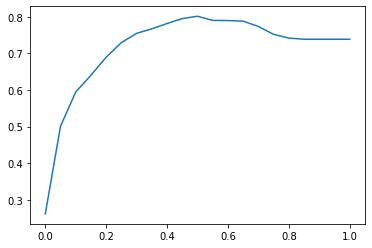

In [118]:
# plotting accuracies
threshold = np.linspace(0,1,21)
accuracies = []
for t in threshold:
    churn = y_pred >= t
    acc = accuracy_score(y_val,churn)
    accuracies.append(acc)

plt.plot(threshold, accuracies)

Taking the baseline model as always false to check if 80% accuracy is good enough or not

In [119]:
size_val = len(y_val)
baseline = np.repeat(False,size_val)
print(accuracy_score(baseline,y_val))  
# This shows that even if the model always predicts false still the accuracy would be 73%.
# This shows that our model is not good enough in front of dummy model which always predict as the customer not churning.

0.7387096774193549


### Confusion table
Creating confusion table with NumPy

In [120]:
t = 0.5
predict_churn = (y_pred >= t)
predict_no_churn = (y_pred < t)
actual_churn = (y_val == 1)
actual_no_churn = (y_val == 0)

true_positive = (predict_churn & actual_churn).sum()
false_positive = (predict_churn & actual_no_churn).sum()
false_negative = (predict_no_churn & actual_churn).sum()
true_negative = (predict_no_churn & actual_no_churn).sum()

confusion_table = np.array(
    [[true_negative, false_positive],
    [false_negative, true_positive]])

(confusion_table/ confusion_table.sum()).round(3)

array([[0.646, 0.092],
       [0.106, 0.155]])

In [121]:
tpr = (true_positive / (true_positive + false_negative)).round(3)  # precision
fpr = (false_positive / (false_positive + true_negative)).round(3)  # recall
tpr,fpr, true_positive + false_negative

(0.595, 0.125, 486)

This tells us we were only able to identify 59% of users who actually churned.

In [123]:
# Computing confusion table for different thresholds
scores = []
thresholds = np.linspace(0,1,101)
for t in thresholds:
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    scores.append((t, tp, fp, tn, fn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'tn', 'fn']
df_scores[::10]

,threshold,tp,fp,tn,fn
0,0.0,486,1374,0,0
10,0.1,458,726,648,28
20,0.2,421,512,862,65
30,0.3,380,350,1024,106
40,0.4,337,257,1117,149
50,0.5,289,172,1202,197
60,0.6,200,105,1269,286
70,0.7,99,34,1340,387
80,0.8,7,1,1373,479
90,0.9,0,0,1374,486


In [124]:
df_scores['tpr'] = (df_scores.tp / (df_scores.tp + df_scores.fn))
df_scores['fpr'] = (df_scores.fp / (df_scores.fp + df_scores.tn))
df_scores[::10]

,threshold,tp,fp,tn,fn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,458,726,648,28,0.942387,0.528384
20,0.2,421,512,862,65,0.866255,0.372635
30,0.3,380,350,1024,106,0.781893,0.254731
40,0.4,337,257,1117,149,0.693416,0.187045
50,0.5,289,172,1202,197,0.594650,0.125182
60,0.6,200,105,1269,286,0.411523,0.076419
70,0.7,99,34,1340,387,0.203704,0.024745
80,0.8,7,1,1373,479,0.014403,0.000728
90,0.9,0,0,1374,486,0.000000,0.000000


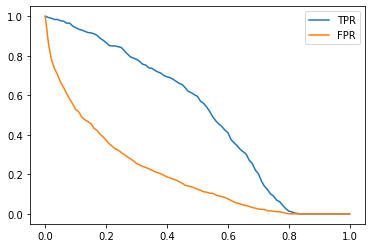

In [125]:
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.legend()

### Random model

In [126]:
np.random.seed(1)
y_rand = np.random.uniform(0,1,size=len(y_val))
((y_rand >= 0.5) == y_val).mean()

0.478494623655914

In [127]:
def tpr_fpr_dataframe(y_val,y_pred):
    scores = []
    thresholds = np.linspace(0,1,101)
    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        scores.append((t, tp, fp, tn, fn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'tn', 'fn']
    df_scores['tpr'] = (df_scores.tp / (df_scores.tp + df_scores.fn))
    df_scores['fpr'] = (df_scores.fp / (df_scores.fp + df_scores.tn))
    return df_scores

In [128]:
df_rand = tpr_fpr_dataframe(y_val,y_rand)
df_rand[::10]

,threshold,tp,fp,tn,fn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,440,1236,138,46,0.905350,0.899563
20,0.2,392,1101,273,94,0.806584,0.801310
30,0.3,339,972,402,147,0.697531,0.707424
40,0.4,288,849,525,198,0.592593,0.617904
50,0.5,239,723,651,247,0.491770,0.526201
60,0.6,193,579,795,293,0.397119,0.421397
70,0.7,152,422,952,334,0.312757,0.307132
80,0.8,98,302,1072,388,0.201646,0.219796
90,0.9,57,147,1227,429,0.117284,0.106987


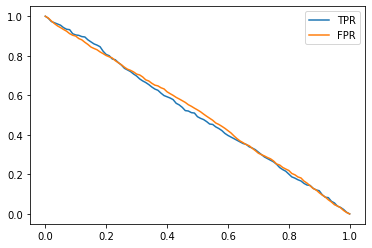

In [129]:
plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')
plt.legend()

### Ideal model

In [130]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1374, 486)

In [131]:
y_ideal = np.repeat([0,1],[num_neg,num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [132]:
1 - y_val.mean()

0.7387096774193549

In [133]:
y_ideal_pred = np.linspace(0,1,len(y_val))
((y_ideal_pred >= 0.7387) == y_ideal).mean() 

1.0

In [134]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,tn,fn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,486,1188,186,0,1.000000,0.864629
20,0.2,486,1002,372,0,1.000000,0.729258
30,0.3,486,816,558,0,1.000000,0.593886
40,0.4,486,630,744,0,1.000000,0.458515
50,0.5,486,444,930,0,1.000000,0.323144
60,0.6,486,258,1116,0,1.000000,0.187773
70,0.7,486,72,1302,0,1.000000,0.052402
80,0.8,372,0,1374,114,0.765432,0.000000
90,0.9,186,0,1374,300,0.382716,0.000000


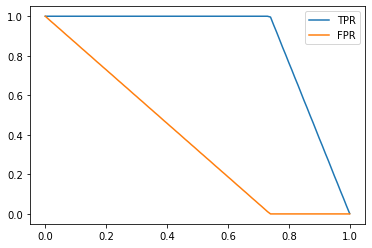

In [135]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR')
plt.legend()

We can say that model predicts correctly always

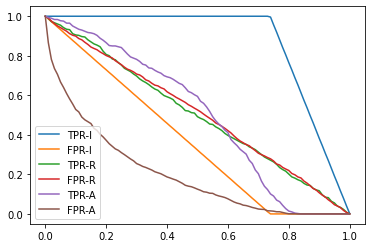

In [136]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR-I')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR-I')

plt.plot(df_rand.threshold, df_rand.tpr, label='TPR-R')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR-R')

plt.plot(df_scores.threshold, df_scores.tpr, label='TPR-A')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR-A')

plt.legend()

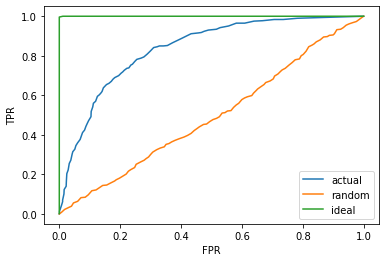

In [137]:
plt.plot(df_scores.fpr,df_scores.tpr,label='actual')
plt.plot(df_rand.fpr,df_rand.tpr,label='random')
plt.plot(df_ideal.fpr,df_ideal.tpr,label='ideal')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs)>

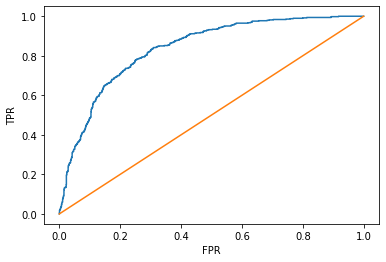

In [138]:
from sklearn.metrics import roc_curve
fpr,tpr, thresholds = roc_curve(y_val,y_pred)
plt.plot(fpr,tpr,label='model')
plt.plot([0,1],[0,1],label='random')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend

### ROC AUC

In [139]:
from sklearn.metrics import auc
auc(fpr,tpr)

0.8363366398907399

In [140]:
auc(df_scores.fpr,df_scores.tpr)

0.8359150837721111

In [141]:
auc(df_ideal.fpr,df_ideal.tpr)

0.9999760394390833

In [142]:
fpr, tpr, thresholds = roc_curve(y_val,y_pred)
auc(fpr,tpr)

0.8363366398907399

In [143]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val,y_pred)

0.8363366398907399

## Cross validation

In [168]:
def train(df,y,C):
    dicts = df[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter = 1000)
    model.fit(X,y)

    return dv, model

In [169]:
def predict(df,dv,model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]

    return y_pred

In [146]:
# y_pred = predict(df_val,dv, model)

In [147]:
from sklearn.model_selection import KFold

In [170]:
n_splits = 5

for C in ([0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits,shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train,y_train, C=C)
        y_pred = predict(df_val,dv,model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    
    print('%s - %.3f +- %.3f'%(C, np.mean(scores), np.std(scores)))

0.0001 - 0.811 +- 0.009
0.001 - 0.825 +- 0.009
0.01 - 0.840 +- 0.009
0.1 - 0.841 +- 0.008
0.5 - 0.840 +- 0.006
1 - 0.840 +- 0.008
5 - 0.841 +- 0.008
10 - 0.841 +- 0.007


Training final model

In [172]:
dv, model = train(df_train_full, df_train_full.churn.values, C=1.0)
y_pred = predict(df_test,dv,model)
auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259